# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Bintang Ramadhan
- Email: mbintangr13@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan antara user casual dan user registered?
- Apakah terjadi peningkatan pengguna dalam 2 tahun terakhir?
- Apa pengaruh musim terhadap jumlah pengguna?
- Bulan apakah dengan rata rata pengguna terbanyak dan tersedikit?
- Pada hari apakah pengguna lebih banyak?
- Apakah rata rata pengguna lebih banyak pada saat holiday atau non-holiday?
- Apakah rata rata pengguna lebih banyak pada saat working day atau non working day?
- Pada saat pagi, siang, sore, atau malam dengan rata rata pengguna terbanyak?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import calendar

## Data Wrangling

### Gathering Data

#### Gather day.csv Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
517,518,2012-06-01,2,1,6,0,5,1,2,0.654167,0.607962,0.755417,0.237563,533,3594,4127
467,468,2012-04-12,2,1,4,0,4,1,1,0.397500,0.387604,0.466250,0.290429,663,4746,5409
158,159,2011-06-08,2,0,6,0,3,1,1,0.775833,0.727279,0.622083,0.136817,676,3725,4401
526,527,2012-06-10,2,1,6,0,0,0,1,0.726667,0.663517,0.538333,0.133721,2224,4374,6598
337,338,2011-12-04,4,0,12,0,0,0,1,0.330833,0.349100,0.775833,0.083958,634,2851,3485
110,111,2011-04-21,2,0,4,0,4,1,1,0.459167,0.453892,0.407083,0.325258,745,3444,4189
279,280,2011-10-07,4,0,10,0,5,1,1,0.510833,0.504404,0.684167,0.022392,949,4036,4985
99,100,2011-04-10,2,0,4,0,0,0,2,0.426667,0.426737,0.857500,0.146767,1188,1707,2895
502,503,2012-05-17,2,1,5,0,4,1,1,0.593333,0.572613,0.520000,0.229475,1242,6142,7384
73,74,2011-03-15,1,0,3,0,2,1,2,0.317391,0.318178,0.655652,0.184309,289,1767,2056


#### Gather hour.csv Data

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

#### Assess day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.duplicated().sum()

0

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assess hour_df Data

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.duplicated().sum()

0

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Cleaning day_df Data

In [12]:
day_df.dteday = pd.to_datetime(day_df.dteday)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Cleaning hour_df Data

In [13]:
hour_df.dteday = pd.to_datetime(hour_df.dteday)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day_df

In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
day_df['yr'] = day_df['yr'].apply(lambda x: "2011" if x == 0 else "2012")
day_df['mnth'] = day_df['mnth'].apply(lambda x: calendar.month_name[x])
day_df['season'] = day_df['season'].apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
day_df['holiday'] = day_df['holiday'].apply(lambda x: "Holiday" if x == 1 else "Non Holiday")
day_df['weekday'] = day_df['weekday'].apply(lambda x: calendar.day_name[(x-1)%7])
day_df['workingday'] = day_df['workingday'].apply(lambda x: "Working Day" if x == 1 else "Non Working Day")

day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
227,228,2011-08-16,Fall,2011,August,Non Holiday,Tuesday,Working Day,1,0.700833,0.645837,0.578333,0.236329,721,4004,4725
602,603,2012-08-25,Fall,2012,August,Non Holiday,Saturday,Non Working Day,2,0.661667,0.618696,0.712917,0.244408,1829,4224,6053
332,333,2011-11-29,Winter,2011,November,Non Holiday,Tuesday,Working Day,2,0.458333,0.451375,0.830833,0.258092,96,2818,2914
525,526,2012-06-09,Summer,2012,June,Non Holiday,Saturday,Non Working Day,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498
150,151,2011-05-31,Summer,2011,May,Non Holiday,Tuesday,Working Day,1,0.775000,0.725383,0.636667,0.111329,673,3309,3982
257,258,2011-09-15,Fall,2011,September,Non Holiday,Thursday,Working Day,2,0.577500,0.553671,0.709167,0.271146,428,3231,3659
634,635,2012-09-26,Winter,2012,September,Non Holiday,Wednesday,Working Day,1,0.635000,0.596613,0.630833,0.244400,787,6946,7733
646,647,2012-10-08,Winter,2012,October,Holiday,Monday,Non Working Day,2,0.383333,0.387608,0.709583,0.189679,874,4604,5478
488,489,2012-05-03,Summer,2012,May,Non Holiday,Thursday,Working Day,2,0.560000,0.537242,0.768333,0.133696,764,5657,6421
1,2,2011-01-02,Spring,2011,January,Non Holiday,Sunday,Non Working Day,2,0.363478,0.353739,0.696087,0.248539,131,670,801


#### Mencari perbandingan jumlah casual user dan registered user

In [16]:
day_df.agg({
    "casual": "sum",
    "registered": "sum"
})

casual         620017
registered    2672662
dtype: int64

#### Jumlah user berdasarkan tahun

In [17]:
round(day_df.groupby(by="yr").cnt.sum())

yr
2011    1243103
2012    2049576
Name: cnt, dtype: int64

#### Rata rata Jumlah user berdasarkan Season

In [18]:
round(hour_df.groupby(by="season").cnt.mean())

season
1    111.0
2    208.0
3    236.0
4    199.0
Name: cnt, dtype: float64

#### Bulan dengan rata rata user terbanyak

In [19]:
round(day_df.groupby(by="mnth").cnt.mean().sort_values(ascending=False))

mnth
June         5772.0
September    5767.0
August       5664.0
July         5564.0
May          5350.0
October      5199.0
April        4485.0
November     4247.0
March        3692.0
December     3404.0
February     2655.0
January      2176.0
Name: cnt, dtype: float64

#### Bulan dengan rata rata user tersedikit

In [20]:
round(hour_df.groupby(by="mnth").cnt.mean().sort_values(ascending=True))

mnth
1      94.0
2     113.0
12    142.0
3     155.0
11    177.0
4     187.0
10    222.0
5     223.0
7     232.0
8     238.0
6     241.0
9     241.0
Name: cnt, dtype: float64

#### Rata rata jumlah user berdasarkan hari

In [21]:
round(hour_df.groupby(by="weekday").cnt.mean().reset_index())

,weekday,cnt
0,0,177.0
1,1,184.0
2,2,191.0
3,3,191.0
4,4,196.0
5,5,196.0
6,6,190.0


#### Rata rata jumlah User pada saat Holiday dan non Holiday

In [22]:
round(day_df.groupby(by="holiday").cnt.mean())

holiday
Holiday        3735.0
Non Holiday    4527.0
Name: cnt, dtype: float64

#### Rata rata jumlah User pada saat Working Day dan non Working Day

In [23]:
round(day_df.groupby(by="workingday").cnt.mean())

workingday
Non Working Day    4330.0
Working Day        4585.0
Name: cnt, dtype: float64

#### Jumlah User pada setiap Time Group

In [24]:

hour_df["time_group"] = hour_df["hr"].apply(lambda x: "Morning" if x >= 3 and x < 10 else ("Afternoon" if x >= 10 and x < 14 else ("Evening" if x >= 14 and x < 20 else "Night")))
round(hour_df.groupby(by="time_group").cnt.sum()).reset_index()

,time_group,cnt
0,Afternoon,646910
1,Evening,1459970
2,Morning,656605
3,Night,529194


### Explore hour_df

In [25]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_group
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5077
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [26]:
hour_df['yr'] = hour_df['yr'].apply(lambda x: "2011" if x == 0 else "2012")
hour_df['mnth'] = hour_df['mnth'].apply(lambda x: calendar.month_name[x])
hour_df['season'] = hour_df['season'].apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
hour_df['holiday'] = hour_df['holiday'].apply(lambda x: "Holiday" if x == 1 else "Non Holiday")
hour_df['weekday'] = hour_df['weekday'].apply(lambda x: calendar.day_name[(x-1)%7])
hour_df['workingday'] = hour_df['workingday'].apply(lambda x: "Working Day" if x == 1 else "Non Working Day")

hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_group
2613,2614,2011-04-23,Summer,2011,April,19,Non Holiday,Saturday,Non Working Day,1,0.56,0.5303,0.83,0.2836,84,199,283,Evening
8460,8461,2011-12-24,Spring,2011,December,4,Non Holiday,Saturday,Non Working Day,2,0.32,0.3182,0.66,0.1642,0,3,3,Morning
13255,13256,2012-07-11,Fall,2012,July,12,Non Holiday,Wednesday,Working Day,2,0.78,0.6970,0.43,0.0000,69,223,292,Afternoon
11835,11836,2012-05-13,Summer,2012,May,8,Non Holiday,Sunday,Non Working Day,1,0.56,0.5303,0.64,0.1642,32,124,156,Morning
2590,2591,2011-04-22,Summer,2011,April,20,Non Holiday,Friday,Working Day,3,0.32,0.3030,0.87,0.2239,8,39,47,Night
16328,16329,2012-11-18,Winter,2012,November,2,Non Holiday,Sunday,Non Working Day,1,0.28,0.2879,0.81,0.1045,8,65,73,Night
718,719,2011-02-02,Spring,2011,February,7,Non Holiday,Wednesday,Working Day,3,0.22,0.2121,0.93,0.2239,1,48,49,Morning
4837,4838,2011-07-25,Fall,2011,July,11,Non Holiday,Monday,Working Day,2,0.84,0.8333,0.59,0.1940,24,83,107,Afternoon
3886,3887,2011-06-15,Summer,2011,June,20,Non Holiday,Wednesday,Working Day,1,0.66,0.6212,0.44,0.1642,57,273,330,Night
16929,16930,2012-12-13,Winter,2012,December,4,Non Holiday,Thursday,Working Day,2,0.26,0.2576,0.56,0.1940,0,8,8,Morning


#### Rata rata jumlah User setiap jam

In [27]:
pd.set_option('display.max_rows', None)
round(hour_df.groupby(by="hr").agg({
    "cnt": "mean"
}).reset_index())

,hr,cnt
0,0,54.0
1,1,33.0
2,2,23.0
3,3,12.0
4,4,6.0
5,5,20.0
6,6,76.0
7,7,212.0
8,8,359.0
9,9,219.0


#### Rata rata jumlah User pada setiap time group

In [28]:
hour_df["time_group"] = hour_df["hr"].apply(lambda x: "Morning" if x >= 3 and x < 10 else ("Afternoon" if x >= 10 and x < 14 else ("Evening" if x >= 14 and x < 20 else "Night")))

round(hour_df.groupby(by="time_group").cnt.mean())

time_group
Afternoon    222.0
Evening      334.0
Morning      131.0
Night        104.0
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan antara user casual dan user registered?

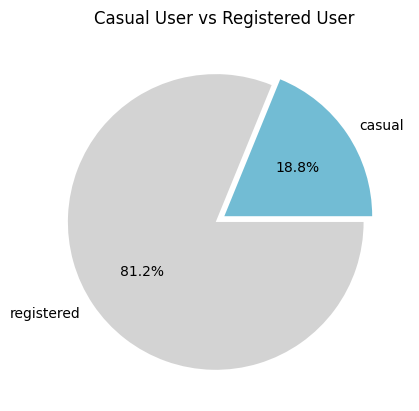

In [29]:
user_type_df = day_df.agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

user_type_df.rename(columns={
    "index": "user_type",
    0: "user_count"
}, inplace=True)

plt.pie(user_type_df['user_count'], labels=user_type_df['user_type'], autopct='%1.1f%%', explode=(0, 0.07), colors=["#72BCD4", "#D3D3D3"])
plt.title("Casual User vs Registered User")
plt.show()

### Pertanyaan 2: Apakah terjadi peningkatan pengguna dalam 2 tahun terakhir?

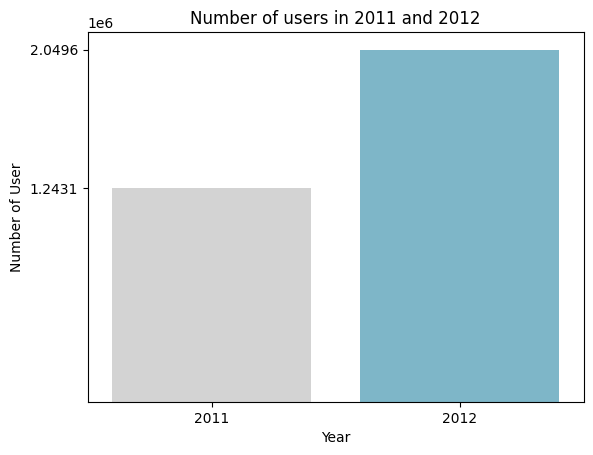

In [30]:
yearly_user_df = day_df.groupby(by="yr").agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=yearly_user_df, x="yr", y="cnt", hue="yr", palette=["#D3D3D3", "#72BCD4"])
plt.title("Number of users in 2011 and 2012")
plt.yticks(yearly_user_df.cnt)
plt.xlabel("Year")
plt.ylabel("Number of User")
plt.show()

### Pertanyaan 3: Manakah musim dengan jumlah pengguna terbanyak?

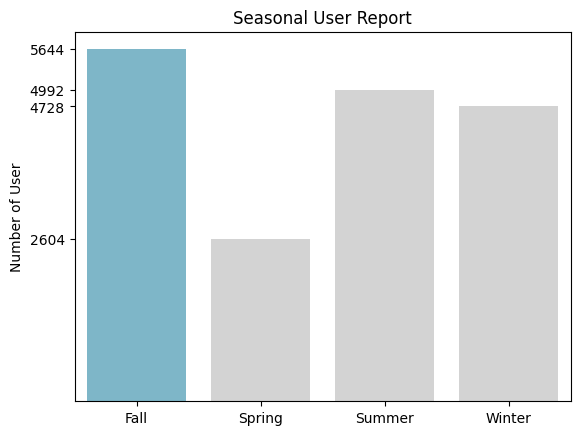

In [31]:
seasonal_user_df = day_df.groupby(by="season").cnt.mean().reset_index()

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(data=seasonal_user_df, x="season", y="cnt", hue="season", palette=colors)
plt.title("Seasonal User Report")
plt.yticks(seasonal_user_df.cnt)
plt.xlabel(None)
plt.ylabel("Number of User")
plt.show()

### Pertanyaan 4: Bulan apakah dengan rata rata pengguna terbanyak dan tersedikit?

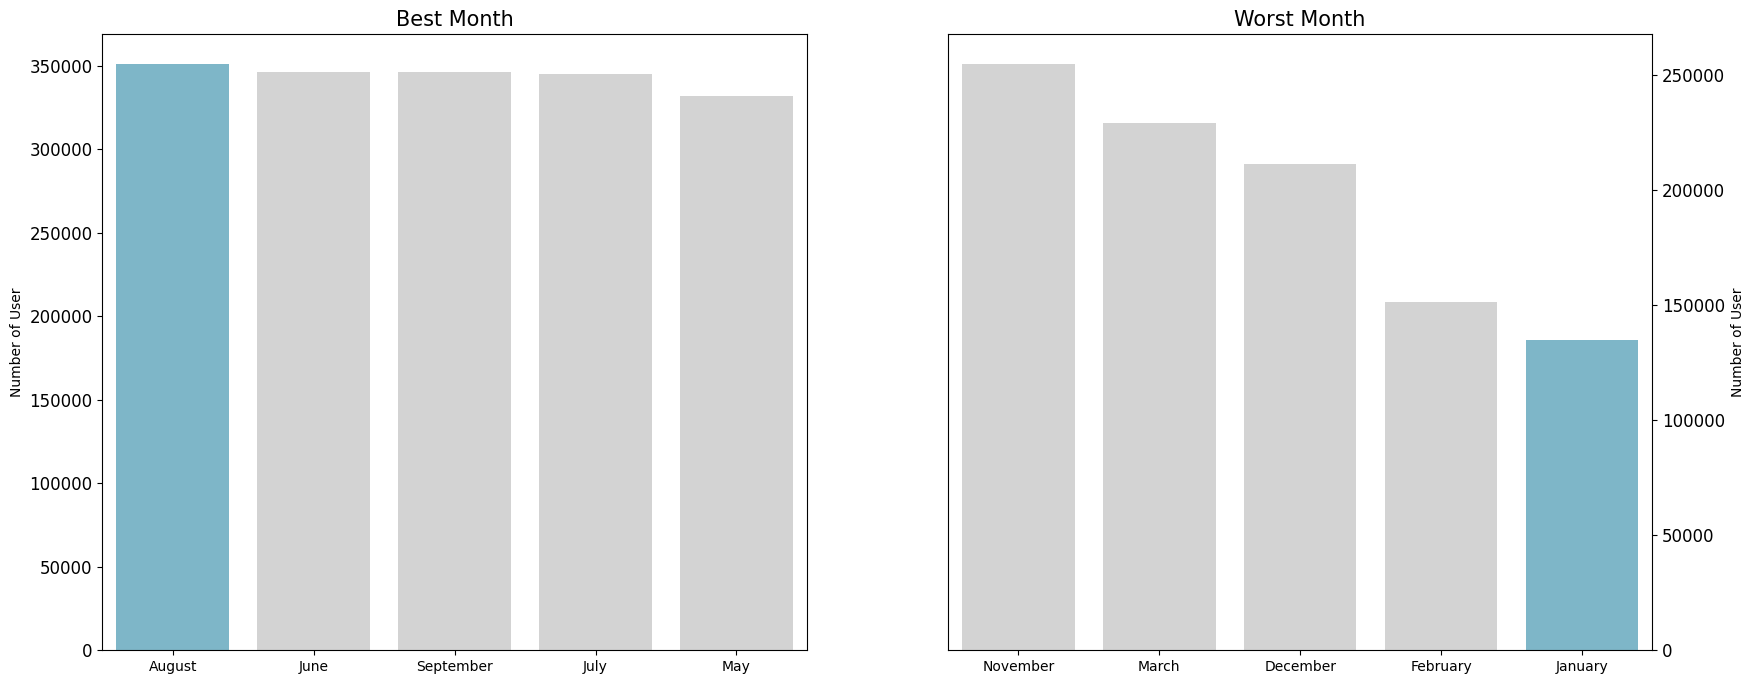

In [32]:
monthly_user_df = day_df.groupby(by="mnth").agg({
    "cnt": "sum"
}).reset_index()

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

sns.barplot(x="mnth", y="cnt", data=monthly_user_df.sort_values(by="cnt", ascending=False).head(5), palette=colors,hue="mnth", ax=ax[0])
ax[0].set_ylabel("Number of User")
ax[0].set_xlabel(None)
ax[0].set_title("Best Month", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="mnth", y="cnt", data=monthly_user_df.sort_values(by="cnt", ascending=True).head(5), palette=colors,hue="mnth", ax=ax[1])
ax[1].set_ylabel("Number of User")
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Month", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.show()

### Pertanyaan 5: Pada hari apakah pengguna lebih banyak?

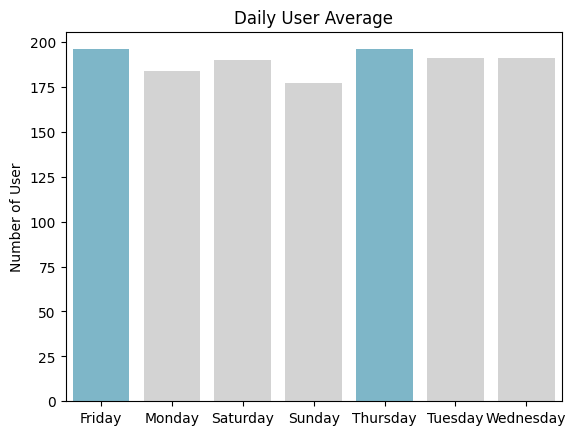

In [33]:
daily_user_df = round(hour_df.groupby(by="weekday").cnt.mean().reset_index())

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(data=daily_user_df, x="weekday", y="cnt", palette=colors, hue="weekday")
plt.title("Daily User Average")
plt.xlabel(None)
plt.ylabel("Number of User")
plt.show()

### Pertanyaan 6: Apakah rata rata pengguna lebih banyak pada saat holiday atau non-holiday?

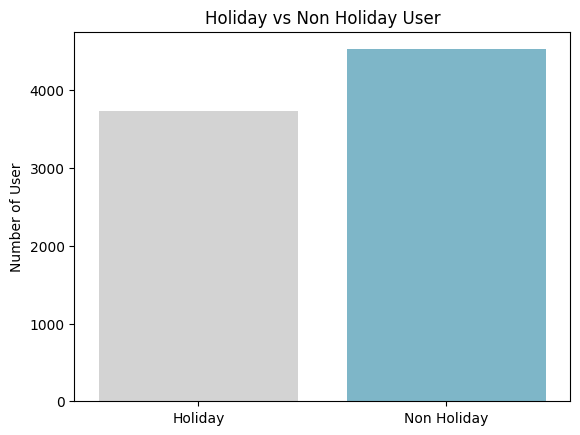

In [34]:
holiday_df = day_df.groupby(by="holiday").agg({
    "cnt": "mean"
}).reset_index()

colors = ["#D3D3D3", "#72BCD4"]

sns.barplot(data=holiday_df, x="holiday", y="cnt", palette=colors, hue="holiday")
plt.title("Holiday vs Non Holiday User")
plt.xlabel(None)
plt.ylabel("Number of User")
plt.show()

### Pertanyaan 7: Apakah rata rata pengguna lebih banyak pada saat working day atau non working day?

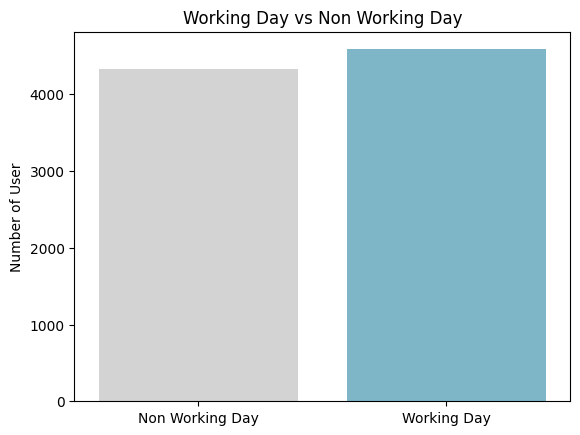

In [35]:
working_day_df = day_df.groupby(by="workingday").agg({
    "cnt": "mean"
}).reset_index()

colors = ["#D3D3D3", "#72BCD4"]

sns.barplot(data=working_day_df, x="workingday", y="cnt", palette=colors, hue="workingday")
plt.title("Working Day vs Non Working Day")
plt.xlabel(None)
plt.ylabel("Number of User")
plt.show()

### Pertanyaan 8: Pada saat pagi, siang, sore, atau malam dengan rata rata pengguna terbanyak?

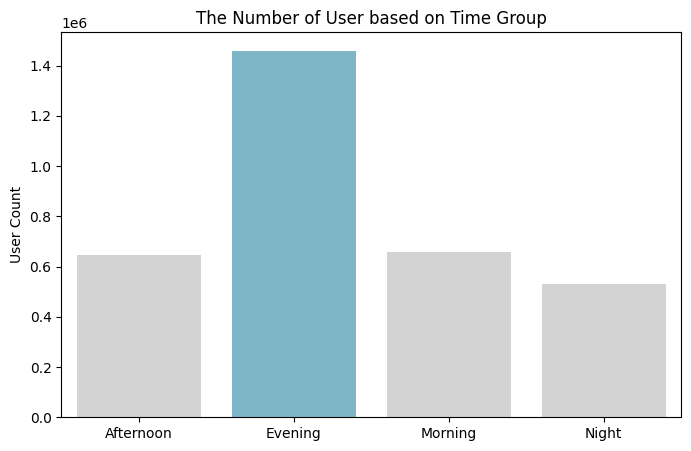

In [36]:
timegroup_user_df = round(hour_df.groupby(by="time_group").cnt.sum()).reset_index()

colors = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(8,5))
sns.barplot(data=timegroup_user_df, x="time_group", y="cnt", hue="time_group", palette=colors)
plt.xlabel(None)
plt.ylabel("User Count")
plt.title("The Number of User based on Time Group")
plt.show()

#### Analisis Tambahan: Berapa jumlah user per hari per time group

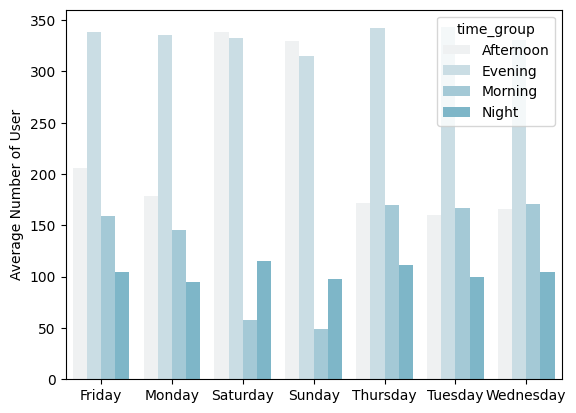

In [40]:
day_timegroup_user_df = round(hour_df.groupby(by=["weekday", "time_group"]).cnt.mean()).reset_index()

sns.barplot(data=day_timegroup_user_df, x="weekday", y="cnt", hue="time_group", palette="light:#72BCD4")
plt.xlabel(None)
plt.ylabel("Average Number of User")
plt.show()

Analisis ini dilakukan dengan mengelompokkan jumlah user berdasarkan hari dan time group. Analisis ini menampilkan persebaran relative user berdasarkan time group setiap harinya.

## Conclusion

- Jumlah Casual User (18.8%) jauh lebih sedikit dibanding Registered User (81.2%).
- Terjadi peningkatan pengguna pada tahun 2012 dari tahun sebelumnya sebesar 806473 pengguna.
- Musim Gugur menjadi musim dengan rata rata pengguna terbanyak yaitu 5644 User per hari.
- Bulan dengan pengguna terbanyak adalah bulan Agustus, dan yang paling sedikit adalah bulan Januari.
- Hari dengan rata rata jumlah user terbanyak adalah hari Jumat dan Kamis.
- Pada waktu non-holiday terdapat lebih banyak pengguna dibanding pada waktu holiday.
- Pada hari kerja terdapat lebih banyak pengguna dibanding pada waktu libur kerja.
- Pada sore hari terdapat lebih banyak pengguna dibanding pada pagi, siang, ataupun malam hari